# Assignment 2

# Lev Kozlov

# Task 1: ANN (30%)
For this task, you are required to build a fully connect feed-forward ANN model
for a multi-label regression problem.

For the given data, you need do proper data preprocessing, design the ANN model,
then fine-tune your model architecture (number of layers, number of neurons,
activation function, learning rate, momentum, regularization).

For evaluating your model, do $80/20$ train test split.

### Data
You will be working with the data in `Task 1.csv` for predicting students'
scores in 3 different exams: math, reading and writing. The columns include:
 - gender
 - race
 - parental level of education
 - lunch meal plan at school
 - whether the student undertook the test preparation course

In [38]:
# uncomment to spend time and install required dependencies
# !pip3 install pandas scikit-learn matplotlib seaborn torch torchvision


In [39]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F


In [40]:
import torch

# I have spent much time installing all drivers and usage of GPU is highly suggested
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# there are some tests messages to check if everything is ok, copied from some tutorial on the internet
print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")

# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device: {torch.cuda.current_device()}")

print(f"Name of current CUDA device: {torch.cuda.get_device_name(cuda_id)}")


Is CUDA supported by this system? True
CUDA version: 11.7
ID of current CUDA device: 0
Name of current CUDA device: NVIDIA GeForce RTX 2060


In [41]:
# read csv file
df = pd.read_csv('Task 1.csv')

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


# Preprocessing

For preprocessing part I decided to apply label encoding for columns which are not numerical. I do not expect high change of results due different encoding because dataset supposely simple.

In [42]:
from sklearn.preprocessing import LabelEncoder

labels = ["gender", "race/ethnicity", "parental level of education",
          "lunch", "test preparation course"]

# I use simple label encoder for each label
for lbl in labels:
    df[lbl] = LabelEncoder().fit_transform(df[lbl].values)

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,67,67,63
1,0,3,5,0,1,40,59,55
2,1,4,4,0,1,59,60,50
3,1,1,2,1,1,77,78,68
4,1,4,0,1,0,78,73,68


<Figure size 1000x500 with 0 Axes>

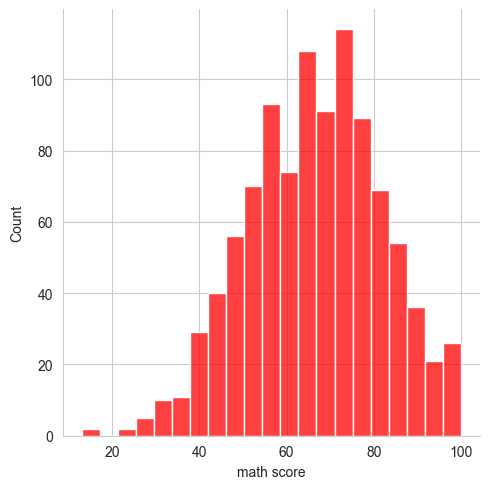

<Figure size 1000x500 with 0 Axes>

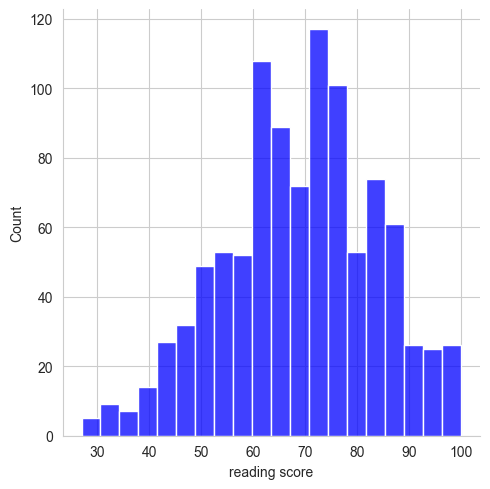

<Figure size 1000x500 with 0 Axes>

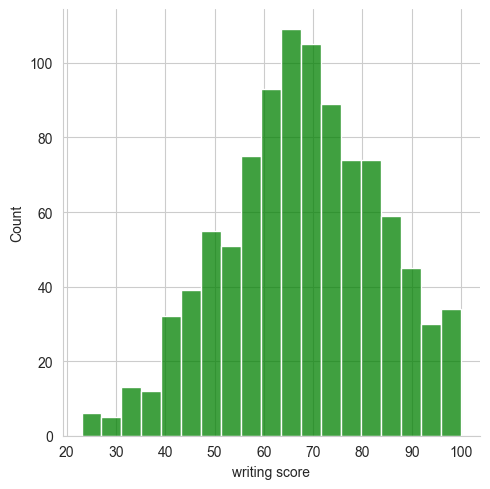

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(10, 5))
sns.displot(df["math score"], color="red")
plt.figure(figsize=(10, 5))
sns.displot(df["reading score"], color="blue")
plt.figure(figsize=(10, 5))
sns.displot(df["writing score"], color="green")


We see that for each score is true that it has some mean value and other scores are spread around. For me it is reasonable to use StandardScaler.

<AxesSubplot: >

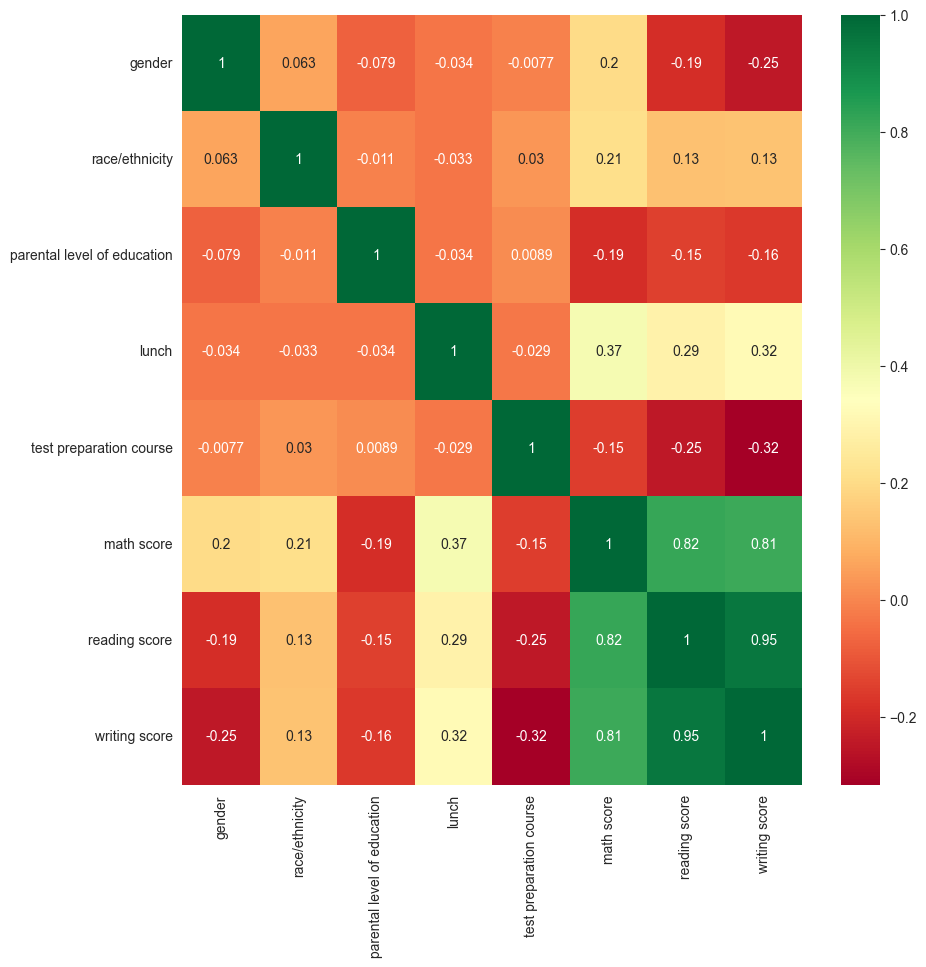

In [44]:
# show correlation between features
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")


In [45]:
from sklearn.preprocessing import StandardScaler

scalers = [
    StandardScaler(),
    StandardScaler(),
    StandardScaler(),
]

for i, col in enumerate(["math score", "reading score", "writing score"]):
    df[col] = scalers[i].fit_transform(df[[col]])

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,0.039233,-0.135914,-0.303851
1,0,3,5,0,1,-1.714564,-0.679027,-0.816895
2,1,4,4,0,1,-0.480410,-0.611138,-1.137548
3,1,1,2,1,1,0.688788,0.610866,0.016802
4,1,4,0,1,0,0.753743,0.271421,0.016802


In [46]:
from sklearn.model_selection import train_test_split

# get the target columns
target = df[["math score", "reading score", "writing score"]].values
# drop the target columns
data = df.drop(["math score", "reading score", "writing score"], axis=1).values

X, y = data, target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X.shape, y.shape

((1000, 5), (1000, 3))

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F


# Model is defined for task 1 ANN
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(5, 4)
        self.fc2 = nn.Linear(4, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


model = Model()

print(model)


Model(
  (fc1): Linear(in_features=5, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=3, bias=True)
)


Epoch: 100, Loss = 1.0087
Epoch: 200, Loss = 0.9689
Epoch: 300, Loss = 0.9302
Epoch: 400, Loss = 0.8730
Epoch: 500, Loss = 0.8095
Epoch: 600, Loss = 0.7753
Epoch: 700, Loss = 0.7633
Epoch: 800, Loss = 0.7585
Epoch: 900, Loss = 0.7553
Epoch: 1000, Loss = 0.7514
Epoch: 1100, Loss = 0.7461
Epoch: 1200, Loss = 0.7393
Epoch: 1300, Loss = 0.7321
Epoch: 1400, Loss = 0.7249
Epoch: 1500, Loss = 0.7204
Epoch: 1600, Loss = 0.7178
Epoch: 1700, Loss = 0.7160
Epoch: 1800, Loss = 0.7142
Epoch: 1900, Loss = 0.7129
Epoch: 2000, Loss = 0.7118


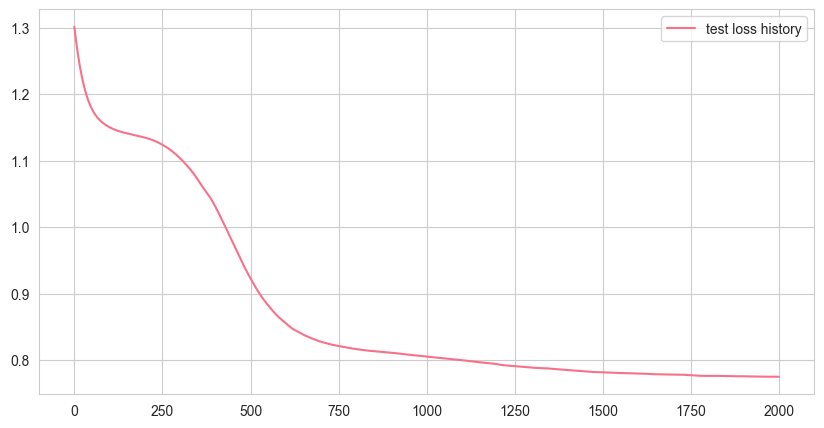

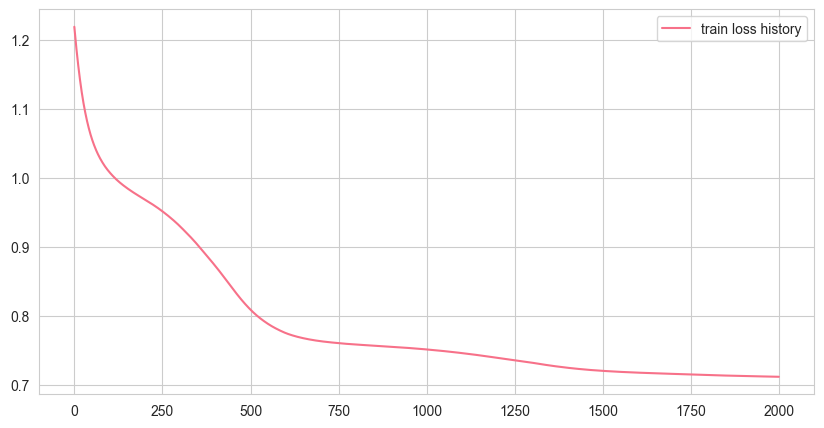

In [48]:
# define loss
criterion = nn.MSELoss()

# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# convert to tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

history_loss = []
history_test_loss = []

# train the model
for epoch in range(2000):
    model.train()
    # forward pass
    y_pred = model(X_train_tensor)
    # compute loss
    loss = criterion(y_pred, y_train_tensor)
    # backward pass
    loss.backward()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch: {epoch+1}, Loss = {loss.item():.4f}')

    history_loss.append(loss.item())
    # update weights
    optimizer.step()
    # zero the gradients
    optimizer.zero_grad()

    # evaluate model performance on test data
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        test_loss = criterion(y_pred, y_test_tensor)
        history_test_loss.append(test_loss.item())

# plot the loss
plt.figure(figsize=(10, 5))
plt.plot(history_test_loss, label="test loss history")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_loss, label="train loss history")
plt.legend()
plt.show()


In [49]:
# convert predicted values with scaler

from sklearn.metrics import mean_absolute_error

y_predc = model(X_test_tensor).detach().numpy()
y_testc = y_test

for i, col in enumerate(["math score", "reading score", "writing score"]):
    y_predc[:, i] = scalers[i].inverse_transform(
        y_predc[:, i].reshape(-1, 1)).reshape(1, -1)
    y_testc[:, i] = scalers[i].inverse_transform(
        y_testc[:, i].reshape(-1, 1)).reshape(1, -1)

# find the mean absolute error for each score

for i, col in enumerate(["math score", "reading score", "writing score"]):
    print(
        f"Mean absolute error for {col}: {mean_absolute_error(y_testc[:, i], y_predc[:, i])}")


Mean absolute error for math score: 10.717213764190674
Mean absolute error for reading score: 10.898112621307373
Mean absolute error for writing score: 10.75972972869873


### Questions

## 1. What preprocessing techniques did you use? Why?

- First of all I found out that there are non-numerical values present. For their encoding I used LabelEncoding from sklearn because I did not expect high change of results due different encoding because dataset supposely simple.
- Then I watched scores which we want to predict and found that they are kinda normally distributed, meaning they spread around mean. So I decided to use StandardScaler for them.

## 2. Describe the fine-tuning process and how you reached your model architecture.

- First of all I determined input and output layers dimensionality. It is 5 (input) and 3 (output).
- I googled and watched videos about peoples intuition regarding neural network architecture tuning. [ref](https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3)
- Most of thoughts are combined that for simple problems (which I consider this is) there is a choice between 1, 2 and 3 layers:
  - 0 - separable function (which is not the case, because we have 5 features and continuous output, I think it is too complex for 0 hidden layers)
  - 1 - can approximate any function with constant mapping from one finite space to another
  - 2 - arbitary smooth mapping function
- Regarding neurons amount choosing, main thoughts were that it should be between size of the input and output layer, so I decided to use 4 neurons in hidden layer for 1 layer case and 4 and 4 neurons for 2 layers structure.

#### Comparison between 1 and 2 layers

1. 2 hidden layers:
   structure:

   ```
   Model(
     (fc1): Linear(in_features=5, out_features=4, bias=True)
     (fc2): Linear(in_features=4, out_features=4, bias=True)
     (fc3): Linear(in_features=4, out_features=3, bias=True)
   )
   ```

   Result:

   1. Mean absolute error for math score: ~_10.611184024810791_

   1. Mean absolute error for reading score: ~_12.012827835083009_

   1. Mean absolute error for writing score: ~_11.258385314941407_

1. 1 hidden layer:
   structure:

   ```
    Model(
      (fc1): Linear(in_features=5, out_features=4, bias=True)
      (fc2): Linear(in_features=4, out_features=3, bias=True)
    )
   ```

   Result:

   1. Mean absolute error for math score: ~_11.027120780944824_

   1. Mean absolute error for reading score: ~_10.523515930175781_

   1. Mean absolute error for writing score: ~_10.725281066894532_

After such comparison I decided to use 1 hidden layer with 4 neurons because it seems that data is not complex enough to use 2 layers.


# Task 2: CNN (40%)
For this task, you will be doing image classification:
- First, adapt your best model from Task 1 to work on this task, and
fit it on the new data. Then, evaluate its performance.
- After that, build a CNN model for image classification.
- Compare both models in terms of accuracy, number of parameters and speed of
inference (the time the model takes to predict 50 samples).

For the given data, you need to do proper data preprocessing and augmentation,
data loaders.
Then fine-tune your model architecture (number of layers, number of filters,
activation function, learning rate, momentum, regularization).

### Data
You will be working with the data in `triple_mnist.zip` for predicting 3-digit
numbers writen in the image. Each image contains 3 digits similar to the
following example (whose label is `039`):

![example](https://github.com/shaohua0116/MultiDigitMNIST/blob/master/asset/examples/039/0_039.png?raw=true)

### Disclaimer: I unzipped the archive manually, I expect you to have it in the same folder as the notebook.

# Preprocessing

After data unzip I discovered that we have to predict 1000 classes, but train data consists only of 640 classes. So I decided to use not just the whole number as class,
rather transfer problem to multiclass classification problem. For each digit I use one-hot encoding. That means each image has corresponding Tensor of length 30.


In [50]:
# here I define some util functions that will help me later
import matplotlib.pyplot as plt


def imshow(image, ax=None, title=None):
    # imshow just shows an image with the given title, helps with debugging
    if ax is None:
        fig, ax = plt.subplots()

    # required to take image from gpu into cpu
    image = image.cpu().numpy().transpose((1, 2, 0))

    ax.set_title(title)
    ax.imshow(image, cmap='binary')
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def from_one_hot(one_hot):
    # one hot encoding for each image is 30 long
    # first 10 are first digit, second 10 are second digit, third 10 are third digit
    # each 10 is one-hot encoding of digit
    # so we just need to find the index of the max value in each 10
    # and then convert to string
    digits = []

    # I really wanted to use standart python functions here, but everything is in GPU here
    hots = torch.split(one_hot, 10)
    for hot in hots:
        digits.append(str(hot.argmax().item()))

    # as simplification all digits were joined through string to int conversion, maybe not optimal, but ok for me
    return int("".join([str(x) for x in digits]))


# Data loading

I have passed several stages implementing this assignment:

1. Loading such amount of data from disk is toooo slow, even if you have M2 SSD. It could take up to 1m for ANN to train and 5m for CNN.
1. We have to utilize GPU if available properly
1. There are several tricks as loading data directly into memory right where we initialize dataset, but it will work only if you have enough resources.
1. Personally I had enough resources and it really sped up training process.


In [51]:
import os
from torchvision import transforms
from torchvision.transforms import RandomAffine
from torch.utils.data import Dataset
from PIL import Image


def target_transform(target):
    # this function transforms folder name to one-hot encoding as I described earlier
    one_hot = torch.zeros(30, device=device)

    # target is 3 digit number
    target = str(target)
    if len(target) < 3:
        # tricky that some numbers start with 0 and after integer conversion their length is not 3
        target = "0" * (3 - len(target)) + target

    digits = [int(x) for x in str(target)]
    for i, digit in enumerate(digits):
        one_hot[i*10 + digit] = 1

    return one_hot


def image_transform(image):
    # create image tensor from PIL image
    image = transforms.ToTensor()(image)

    return image.to(device)


class CustomImageFolder(Dataset):
    # I had to write custom DataSet that it would work well with my approach
    # some references:
    # https://discuss.pytorch.org/t/custom-label-for-torchvision-imagefolder-class/52300
    def __init__(self, root, transform=None, target_transform=None, aug_transform=None):
        self.root = root
        self.transform = transform
        self.target_transform = target_transform

        # importantly, I store all images in GPU, it may not for you, but for me it really improved performance
        self.images = []
        self.targets = []

        for numberdir in os.listdir(root):
            for i, image in enumerate(os.listdir(os.path.join(root, numberdir))):
                imagepath = os.path.join(numberdir, image)

                img = Image.open(os.path.join(root, imagepath))
                if self.transform is not None:
                    img = self.transform(img)

                ndir = int(numberdir)
                if self.target_transform is not None:
                    ndir = self.target_transform(ndir)

                self.images.append(img)
                self.targets.append(ndir)

                # it is my limitation that I augment only 1/3 of images
                if aug_transform is not None and i % 3 == 0:
                    img = aug_transform(img)

                    self.images.append(img)
                    self.targets.append(ndir)

    def __getitem__(self, index):
        image = self.images[index]
        target = self.targets[index]

        return image, target

    def __len__(self):
        return len(self.images)


In [52]:
train_ds = CustomImageFolder(
    root="triple_mnist/train/",
    transform=image_transform,
    target_transform=target_transform,
    aug_transform=RandomAffine(degrees=10), # augmentation setup
)

print('loaded train dataset', len(train_ds))

test_ds = CustomImageFolder(
    "triple_mnist/test/", transform=image_transform, target_transform=target_transform)

print('loaded test dataset', len(test_ds))

val_ds = CustomImageFolder(
    "triple_mnist/val/", transform=image_transform, target_transform=target_transform)

print('loaded validation dataset', len(val_ds))


loaded train dataset 85760
loaded test dataset 20000
loaded validation dataset 16000


In [53]:
# now we create dataloaders for each dataset
from torch.utils.data import DataLoader

train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=64, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=64, shuffle=True)


<AxesSubplot: title={'center': "tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n        0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')"}>

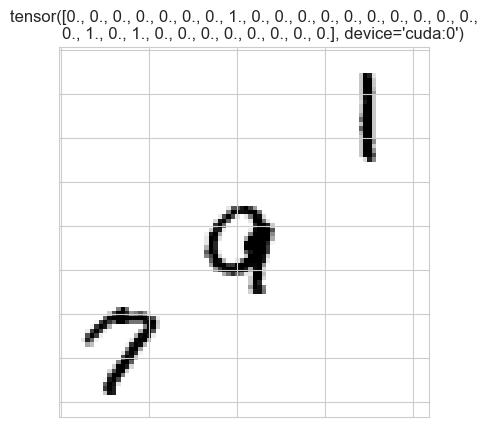

In [54]:
# load some images to see if everything is ok
images, labels = next(iter(train_dl))

imshow(images[0], title=labels[0])


In [83]:
from typing import Tuple


def train(model, train_dl, val_dl, criterion, optimizer, epochs=10):
    # train function simplifies training process for some model with given datasets

    # lists to store results
    train_losses = []
    val_losses = []
    val_accuracy = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for images, labels in train_dl:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # get correct and total values from test dataset
        correct, total, val_loss = test(model, val_dl)

        # calculate and add new results to lists
        train_losses.append(train_loss / len(train_dl))
        val_losses.append(val_loss / len(val_dl))
        val_accuracy.append(correct / total)

        print(f"Epoch: {epoch+1}/{epochs}.. "
              f"Train loss: {train_loss/len(train_dl):.3f}.. "
              f"Val loss: {val_loss/len(val_dl):.3f}.. "
              f"Val accuracy: {(correct / total):.3f}")

    return train_losses, val_losses, val_accuracy


def test(model, test_dl) -> Tuple[int, int, float]:
    # test function simplifies how I will validate my model on dataset
    model.eval()
    correct = 0
    total = 0
    loss = 0
    with torch.no_grad():
        for images, labels in test_dl:
            output = model(images)

            loss += criterion(output, labels).item()

            pred = F.log_softmax(output, dim=1)
            for i, pred_lbl in enumerate(pred):
                if from_one_hot(pred_lbl.to(device)) == from_one_hot(labels[i].to(device)):
                    correct += 1
                total += 1

    print(f"Test accuracy: {(correct / total):.3f}")

    return correct, total, loss


In [108]:


class ANN(nn.Module):
    # define ANN model from task 1
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(84 * 84, 4)    # I change only input size of image
        self.fc2 = nn.Linear(4, 30)  # I set only 30 outputs

    def forward(self, x):
        x = x.view(-1, 84 * 84)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


ann = ANN().to(device)

criterion = nn.BCEWithLogitsLoss().to(device)

optimizer = torch.optim.Adam(ann.parameters(), lr=0.001)

# train ANN
train_losses, val_losses, val_acc = train(
    ann, train_dl, val_dl, criterion, optimizer, epochs=10)

# uncomment to save model for later use
# torch.save(ann.state_dict(), 'ann.pth')


Test accuracy: 0.000
Epoch: 1/10.. Train loss: 0.370.. Val loss: 0.369.. Val accuracy: 0.000
Test accuracy: 0.004
Epoch: 2/10.. Train loss: 0.366.. Val loss: 0.364.. Val accuracy: 0.004
Test accuracy: 0.002
Epoch: 3/10.. Train loss: 0.359.. Val loss: 0.361.. Val accuracy: 0.002
Test accuracy: 0.004
Epoch: 4/10.. Train loss: 0.357.. Val loss: 0.360.. Val accuracy: 0.004
Test accuracy: 0.003
Epoch: 5/10.. Train loss: 0.357.. Val loss: 0.359.. Val accuracy: 0.003
Test accuracy: 0.005
Epoch: 6/10.. Train loss: 0.356.. Val loss: 0.359.. Val accuracy: 0.005
Test accuracy: 0.005
Epoch: 7/10.. Train loss: 0.356.. Val loss: 0.359.. Val accuracy: 0.005
Test accuracy: 0.007
Epoch: 8/10.. Train loss: 0.356.. Val loss: 0.359.. Val accuracy: 0.007
Test accuracy: 0.005
Epoch: 9/10.. Train loss: 0.356.. Val loss: 0.359.. Val accuracy: 0.005
Test accuracy: 0.006
Epoch: 10/10.. Train loss: 0.355.. Val loss: 0.359.. Val accuracy: 0.006


In [71]:
test(ann, test_dl)


Test accuracy: 0.009


(188, 20000, 108.25696021318436)

## As result we see not much performace from ANN because its structure is too simple for this problem.

## Let me clarify process of model choosing

1. As dataset says it is based on MNIST dataset. That gave me an idea to start reserching how people attempted to solve MNIST problem.
1. I reserched Kaggle and found [this](https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist) notebook. It is very informative and I decided to use it as a starting point.
1. It uses idea that we can create CNN with several "combinations" of Conv2D and MaxPool2D operations. I decided to test # of combinations in range [1, 5].



In [98]:
class CNNtest(nn.Module):
    def __init__(self, idx: int):
        super().__init__()

        self.convs = [
            nn.Sequential(
                nn.Conv2d(1, 16, 3, 1, 1),
                nn.ReLU(),
                nn.MaxPool2d(2),
            ),
            nn.Sequential(
                nn.Conv2d(16, 32, 3, 1, 1),
                nn.ReLU(),
                nn.MaxPool2d(2),
            ),
            nn.Sequential(
                nn.Conv2d(32, 64, 3, 1, 1),
                nn.ReLU(),
                nn.MaxPool2d(2),
            ),
            nn.Sequential(
                nn.Conv2d(64, 128, 3, 1, 1),
                nn.ReLU(),
                nn.MaxPool2d(2),
            ),
            nn.Sequential(
                nn.Conv2d(128, 256, 3, 1, 1),
                nn.ReLU(),
                nn.MaxPool2d(2),
            )
        ][:idx + 1]

        # had to add it because of variable # of convolutional layers
        for i, conv in enumerate(self.convs):
            self.add_module(f'conv{i}', conv)

        # I already precomputed the size of the output of the last conv layer
        linear_neurons = [
            16 * 42 * 42,
            32 * 21 * 21,
            64 * 10 * 10,
            128 * 5 * 5,
            256 * 2 * 2,
        ][idx]

        self.l1 = nn.Linear(linear_neurons, 256)
        self.l2 = nn.Linear(256, 100)
        self.l3 = nn.Linear(100, 30)

    def forward(self, x):
        for conv in self.convs:
            x = conv(x)

        x = x.view(x.size(0), -1)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        return F.log_softmax(x, dim=1)


models = [CNNtest(i) for i in range(5)]

models_results = []

for model in models:
    model = model.to(device)

    criterion = nn.BCEWithLogitsLoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_losses, val_losses, val_acc = train(
        model, train_dl, val_dl, criterion, optimizer, epochs=5)
    models_results.append((train_losses, val_losses, val_acc))


Test accuracy: 0.220
Epoch: 1/5.. Train loss: 0.310.. Val loss: 0.257.. Val accuracy: 0.220
Test accuracy: 0.426
Epoch: 2/5.. Train loss: 0.233.. Val loss: 0.221.. Val accuracy: 0.426
Test accuracy: 0.488
Epoch: 3/5.. Train loss: 0.212.. Val loss: 0.211.. Val accuracy: 0.488
Test accuracy: 0.537
Epoch: 4/5.. Train loss: 0.201.. Val loss: 0.205.. Val accuracy: 0.537
Test accuracy: 0.542
Epoch: 5/5.. Train loss: 0.193.. Val loss: 0.203.. Val accuracy: 0.542
Test accuracy: 0.717
Epoch: 1/5.. Train loss: 0.233.. Val loss: 0.187.. Val accuracy: 0.717
Test accuracy: 0.819
Epoch: 2/5.. Train loss: 0.172.. Val loss: 0.170.. Val accuracy: 0.819
Test accuracy: 0.858
Epoch: 3/5.. Train loss: 0.159.. Val loss: 0.162.. Val accuracy: 0.858
Test accuracy: 0.867
Epoch: 4/5.. Train loss: 0.152.. Val loss: 0.161.. Val accuracy: 0.867
Test accuracy: 0.866
Epoch: 5/5.. Train loss: 0.148.. Val loss: 0.160.. Val accuracy: 0.866
Test accuracy: 0.858
Epoch: 1/5.. Train loss: 0.208.. Val loss: 0.167.. Val accu

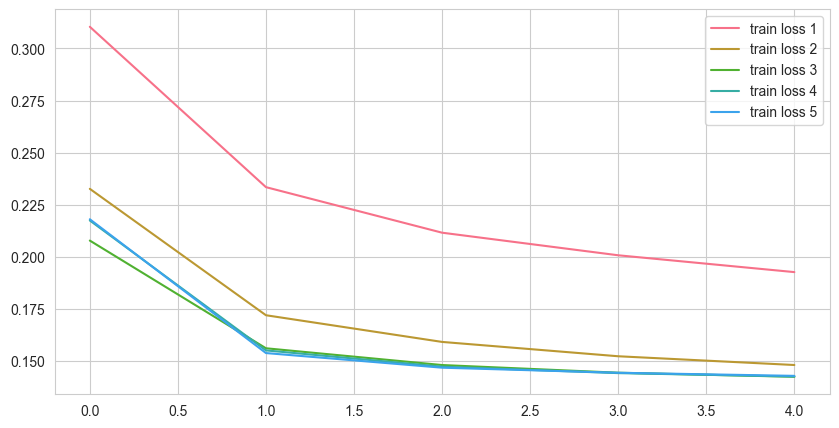

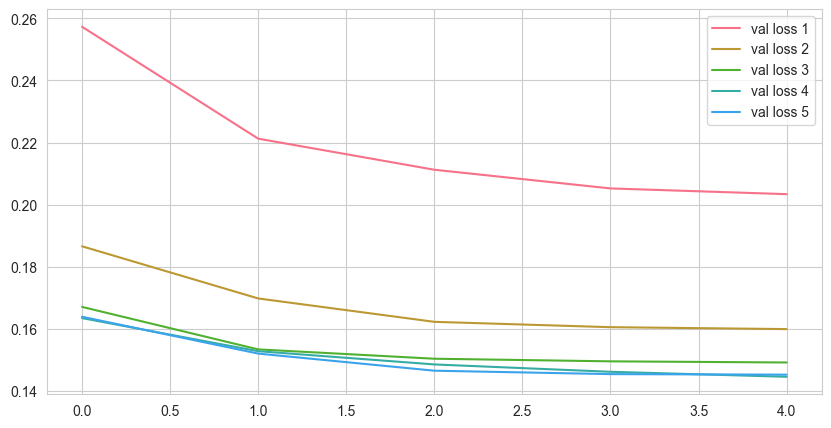

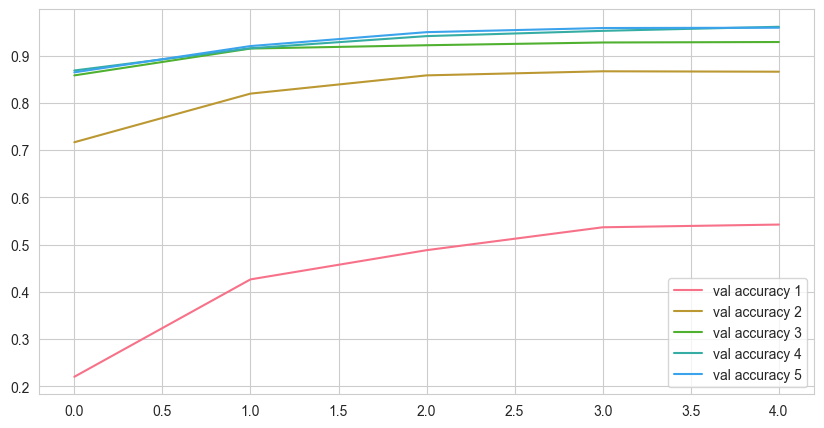

In [99]:
plt.figure(figsize=(10, 5))
for i in range(len(models)):
    plt.plot(models_results[i][0], label=f'train loss {i + 1}')
plt.legend()

plt.figure(figsize=(10, 5))
for i in range(len(models)):
    plt.plot(models_results[i][1], label=f'val loss {i + 1}')
plt.legend()

plt.figure(figsize=(10, 5))
for i in range(len(models)):
    plt.plot(models_results[i][2], label=f'val accuracy {i + 1}')
plt.legend()

## From such testings on 5 epochs I decided to use 4 combinations as 5 combinations perform not much better, but increases compututational complexity.

In [100]:
# here I define final model such that there won't be any differences later

class CNN(nn.Module):
    # CNN model for task 2
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        self.fc1 = nn.Linear(128 * 5 * 5, 256)

        self.fc2 = nn.Linear(256, 100)

        self.fc3 = nn.Linear(100, 30)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)


In [101]:

cnn = CNN().to(device)
criterion = nn.BCEWithLogitsLoss().to(device)
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)

# train CNN
train_losses, val_losses, val_acc = train(
    cnn, train_dl, val_dl, criterion, optimizer, epochs=10)

# uncomment to save model
# torch.save(cnn.state_dict(), 'cnn.pth')


Test accuracy: 0.898
Epoch: 1/10.. Train loss: 0.206.. Val loss: 0.160.. Val accuracy: 0.898
Test accuracy: 0.933
Epoch: 2/10.. Train loss: 0.152.. Val loss: 0.151.. Val accuracy: 0.933
Test accuracy: 0.965
Epoch: 3/10.. Train loss: 0.146.. Val loss: 0.146.. Val accuracy: 0.965
Test accuracy: 0.964
Epoch: 4/10.. Train loss: 0.143.. Val loss: 0.146.. Val accuracy: 0.964
Test accuracy: 0.968
Epoch: 5/10.. Train loss: 0.142.. Val loss: 0.145.. Val accuracy: 0.968
Test accuracy: 0.971
Epoch: 6/10.. Train loss: 0.141.. Val loss: 0.144.. Val accuracy: 0.971
Test accuracy: 0.971
Epoch: 7/10.. Train loss: 0.141.. Val loss: 0.144.. Val accuracy: 0.971
Test accuracy: 0.975
Epoch: 8/10.. Train loss: 0.140.. Val loss: 0.143.. Val accuracy: 0.975
Test accuracy: 0.976
Epoch: 9/10.. Train loss: 0.140.. Val loss: 0.143.. Val accuracy: 0.976
Test accuracy: 0.979
Epoch: 10/10.. Train loss: 0.140.. Val loss: 0.142.. Val accuracy: 0.979


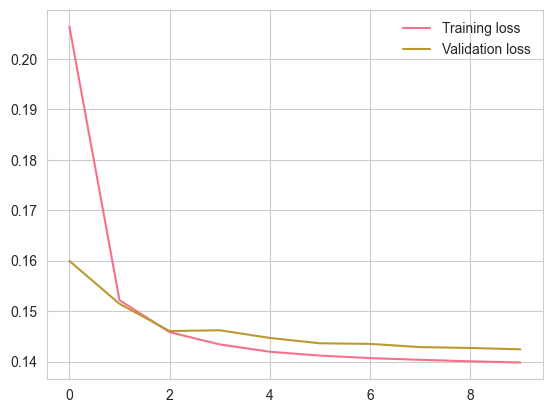

In [102]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()


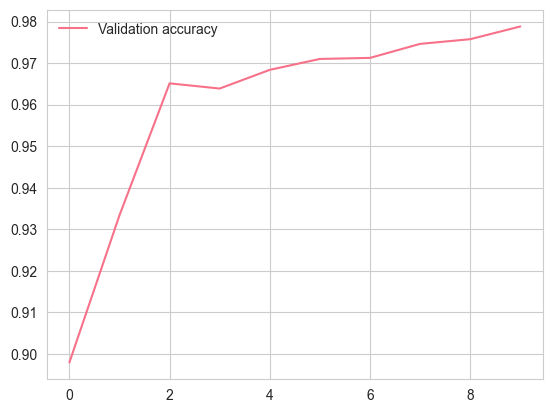

In [103]:
# plot accuracy
plt.plot(val_acc, label='Validation accuracy')
plt.legend(frameon=False)

In [104]:
# test CNN model
test(cnn, test_dl)

Test accuracy: 0.977


(19537, 20000, 44.601473107934)

### CNN model is much more complex and it is able to predict with ~97% accuracy.

In [105]:
# test how fast ANN and CNN predicts 50 images
import time


def measure_time(model, dl):
    start = time.time()
    for i, (images, labels) in enumerate(dl):
        images = images.to(device)
        labels = labels.to(device)
        model(images)
        if i == 50:
            break
    end = time.time()
    return end - start


t1 = measure_time(cnn, test_dl)
t2 = measure_time(ann, test_dl)

print(f"Time spent on CNN: {t1}")
print(f"Time spent on ANN: {t2}")


Time spent on CNN: 0.05887460708618164
Time spent on ANN: 0.01791977882385254


In [107]:
# compare CNN and ANN in terms of trainable parameters
def count_parameters(model):
    # reference: https://stackoverflow.com/questions/49201236/check-the-total-number-of-parameters-in-a-pytorch-model
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


cp1 = count_parameters(cnn)
cp2 = count_parameters(ann)

print(f"Number of trainable parameters in CNN: {cp1}")
print(f"Number of trainable parameters in ANN: {cp2}")


Number of trainable parameters in CNN: 945338
Number of trainable parameters in ANN: 28378


<!-- create table with comparison of ANN and CNN -->

|                                    | ANN                  | CNN                 |
| ---------------------------------- | -------------------- | ------------------- |
| #parameters                        | 28378                | 945338              |
| time of inference on 50 batches, s | 0.016954660415649414 | 0.05682110786437988 |
| accuracy                           | 0.008                | 0.97                |


### Questions

1. What preprocessing techniques did you use? Why?

   Partially was answered in the code comments and markdown blocks above.

   1. Changed one label from folder into 3 labels (one-hot encoding) resulting as a Tensor of length 30 characterizing each image. (not all classes in terms of the whole numbers were present in train dataset)
   1. I did not apply any additional transformations for images because I think that they are well prepared for training. They are well sized and have already been grayscaled.
   1. As another possibility is that the way dataset was generated, it is possible to split image on 3 parts by its width and train separately each digit as simple MNIST, but
      I consider this method rather empirical than scientific.

2. What data augmentation techniques did you use?
   1. Personally I think such amount of data we were provided was enough, my tests with augmenting 1/3 of train data by random
      rotation around center in range of 10 degrees showed that it does not improve model performance, rather slows training process.
   1. As extension, I didn't try it, but what could be possible is to split image into 3 parts by width.
      It will work because code generator of this dataset is based on simple mnist dataset and it just merges three images into one.
      It will be genius movement to split 64k images by digits, we will get 192k images of each digit and using permutation would achieve enormous amount of data.
3. Describe the fine-tuning process and how you reached your final CNN model.

   Partially explained in blocks above.

   1. Looked up the most popular CNN architectures people used for simple MNIST dataset in Kaggle.
   1. Found pattern of combining several blocks of Conv2D and MaxPool2D layers.
   1. Investigated how # of such blocs affects metrics on train and validatation sets.
   1. Found that 4 blocks of (Conv2D, MaxPool2D) is the best choice because it provides better results and does not use as much computational power as 5 blocks.


# Task 3: Decision Trees and Ensemble Learning (15%)

For the `loan_data.csv` data, predict if the bank should give a loan or not.
You need to do the following:
- Fine-tune a decision tree on the data
- Fine-tune a random forest on the data
- Compare their performance
- Visualize your DT and one of the trees from the RF

For evaluating your models, do $80/20$ train test split.

### Data
- `credit.policy`: Whether the customer meets the credit underwriting criteria.
- `purpose`: The purpose of the loan.
- `int.rate`: The interest rate of the loan.
- `installment`: The monthly installments owed by the borrower if the loan is funded.
- `log.annual.inc`: The natural logarithm of the self-reported annual income of the borrower.
- `dti`: The debt-to-income ratio of the borrower.
- `fico`: The FICO credit score of the borrower.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance.
- `revol.util`: The borrower's revolving line utilization rate.

In [109]:
import pandas as pd


# read csv file
df = pd.read_csv('loan_data.csv')

df.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [110]:
# check for missing values

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### As there are no missing values, we do not have to impute them.

In [111]:
# encode purpose column using sklearn
from sklearn.preprocessing import LabelEncoder

purpose = LabelEncoder().fit_transform(df["purpose"].values)
df['purpose'] = purpose

df.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<AxesSubplot: >

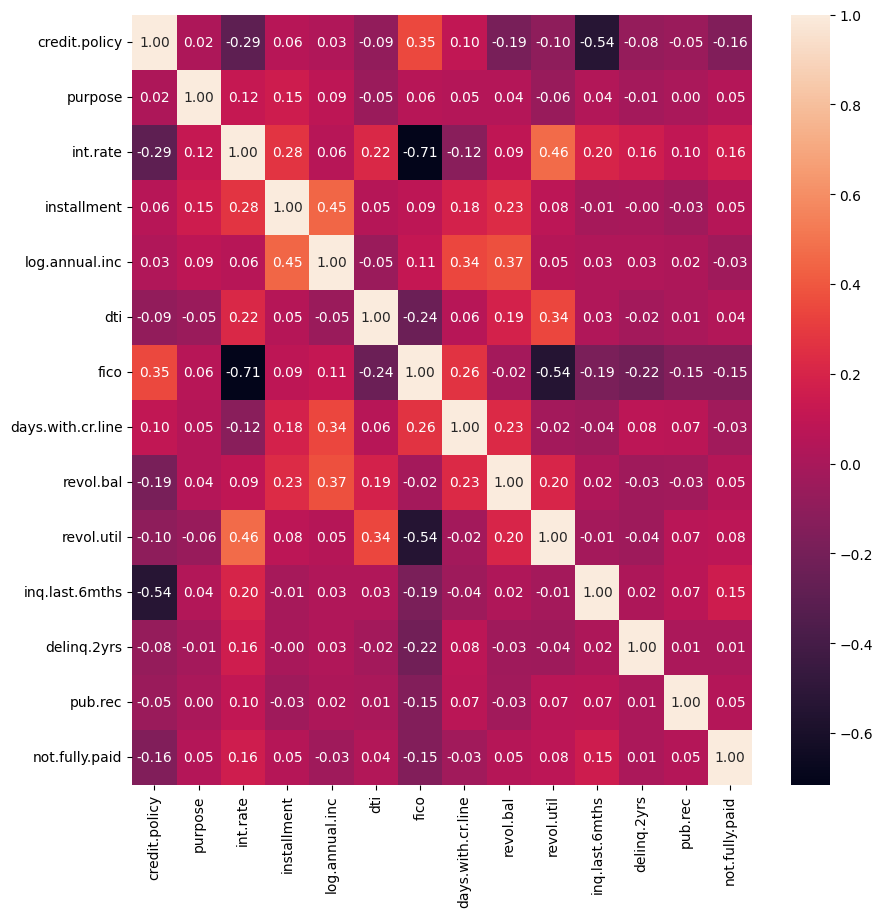

In [6]:
# investigate correlation between features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# get target
target = df[["credit.policy"]].values
# get data
values = df.drop(["credit.policy"], axis=1).values

X, y = values, target

# split according to the task
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X.shape, y.shape


((9578, 13), (9578, 1))

In [8]:
# I decided to split again to have separate validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2)


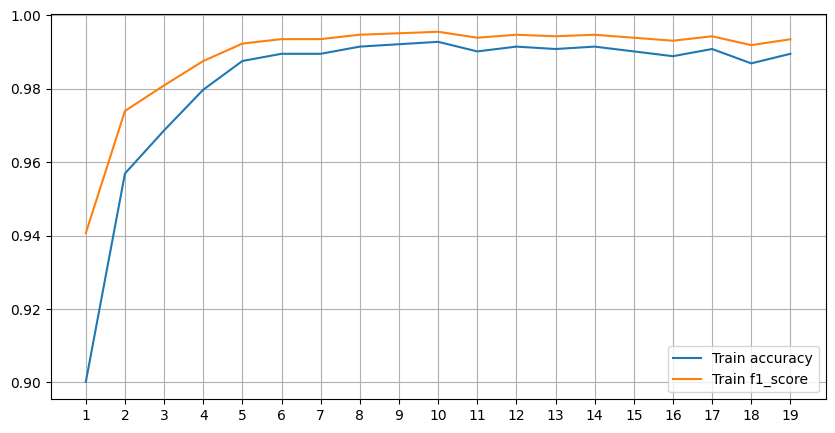

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

max_depths = list(range(1, 20))
train_results = []

# test how max_depth affects the accuracy of the model
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_val)
    train_results.append({
        'max_depth': max_depth,
        'accuracy': accuracy_score(y_val, train_pred),
        'f1_score': f1_score(y_val, train_pred)
    })


plt.figure(figsize=(10, 5))
plt.grid(True)
plt.xticks(range(max(max_depths) + 1))
plt.plot(max_depths, [v['accuracy']
         for v in train_results], label='Train accuracy')
plt.plot(max_depths, [v['f1_score']
         for v in train_results], label='Train f1_score')
plt.legend()
plt.show()


### Actually we see that starting from depth 9-10 we do not gain much of tree complexity and it is not worth to use such deep trees.


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

# create a new model with the best parameters
model = DecisionTreeClassifier(
    max_depth=10,
)

# train the model
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.95      0.97       364
           1       0.99      0.99      0.99      1552

    accuracy                           0.99      1916
   macro avg       0.98      0.97      0.98      1916
weighted avg       0.99      0.99      0.99      1916



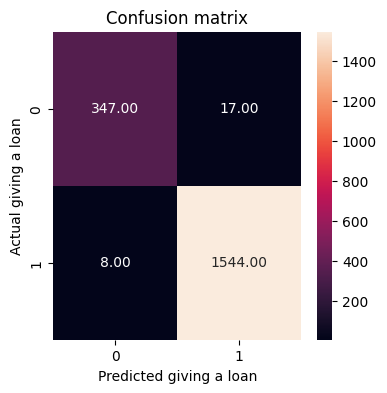

In [42]:
# plot confusion matrix for decision tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt=".2f")

# update axes
plt.ylabel('Actual giving a loan')
plt.xlabel('Predicted giving a loan')
plt.title('Confusion matrix')
plt.show()


### Results are pretty much good.

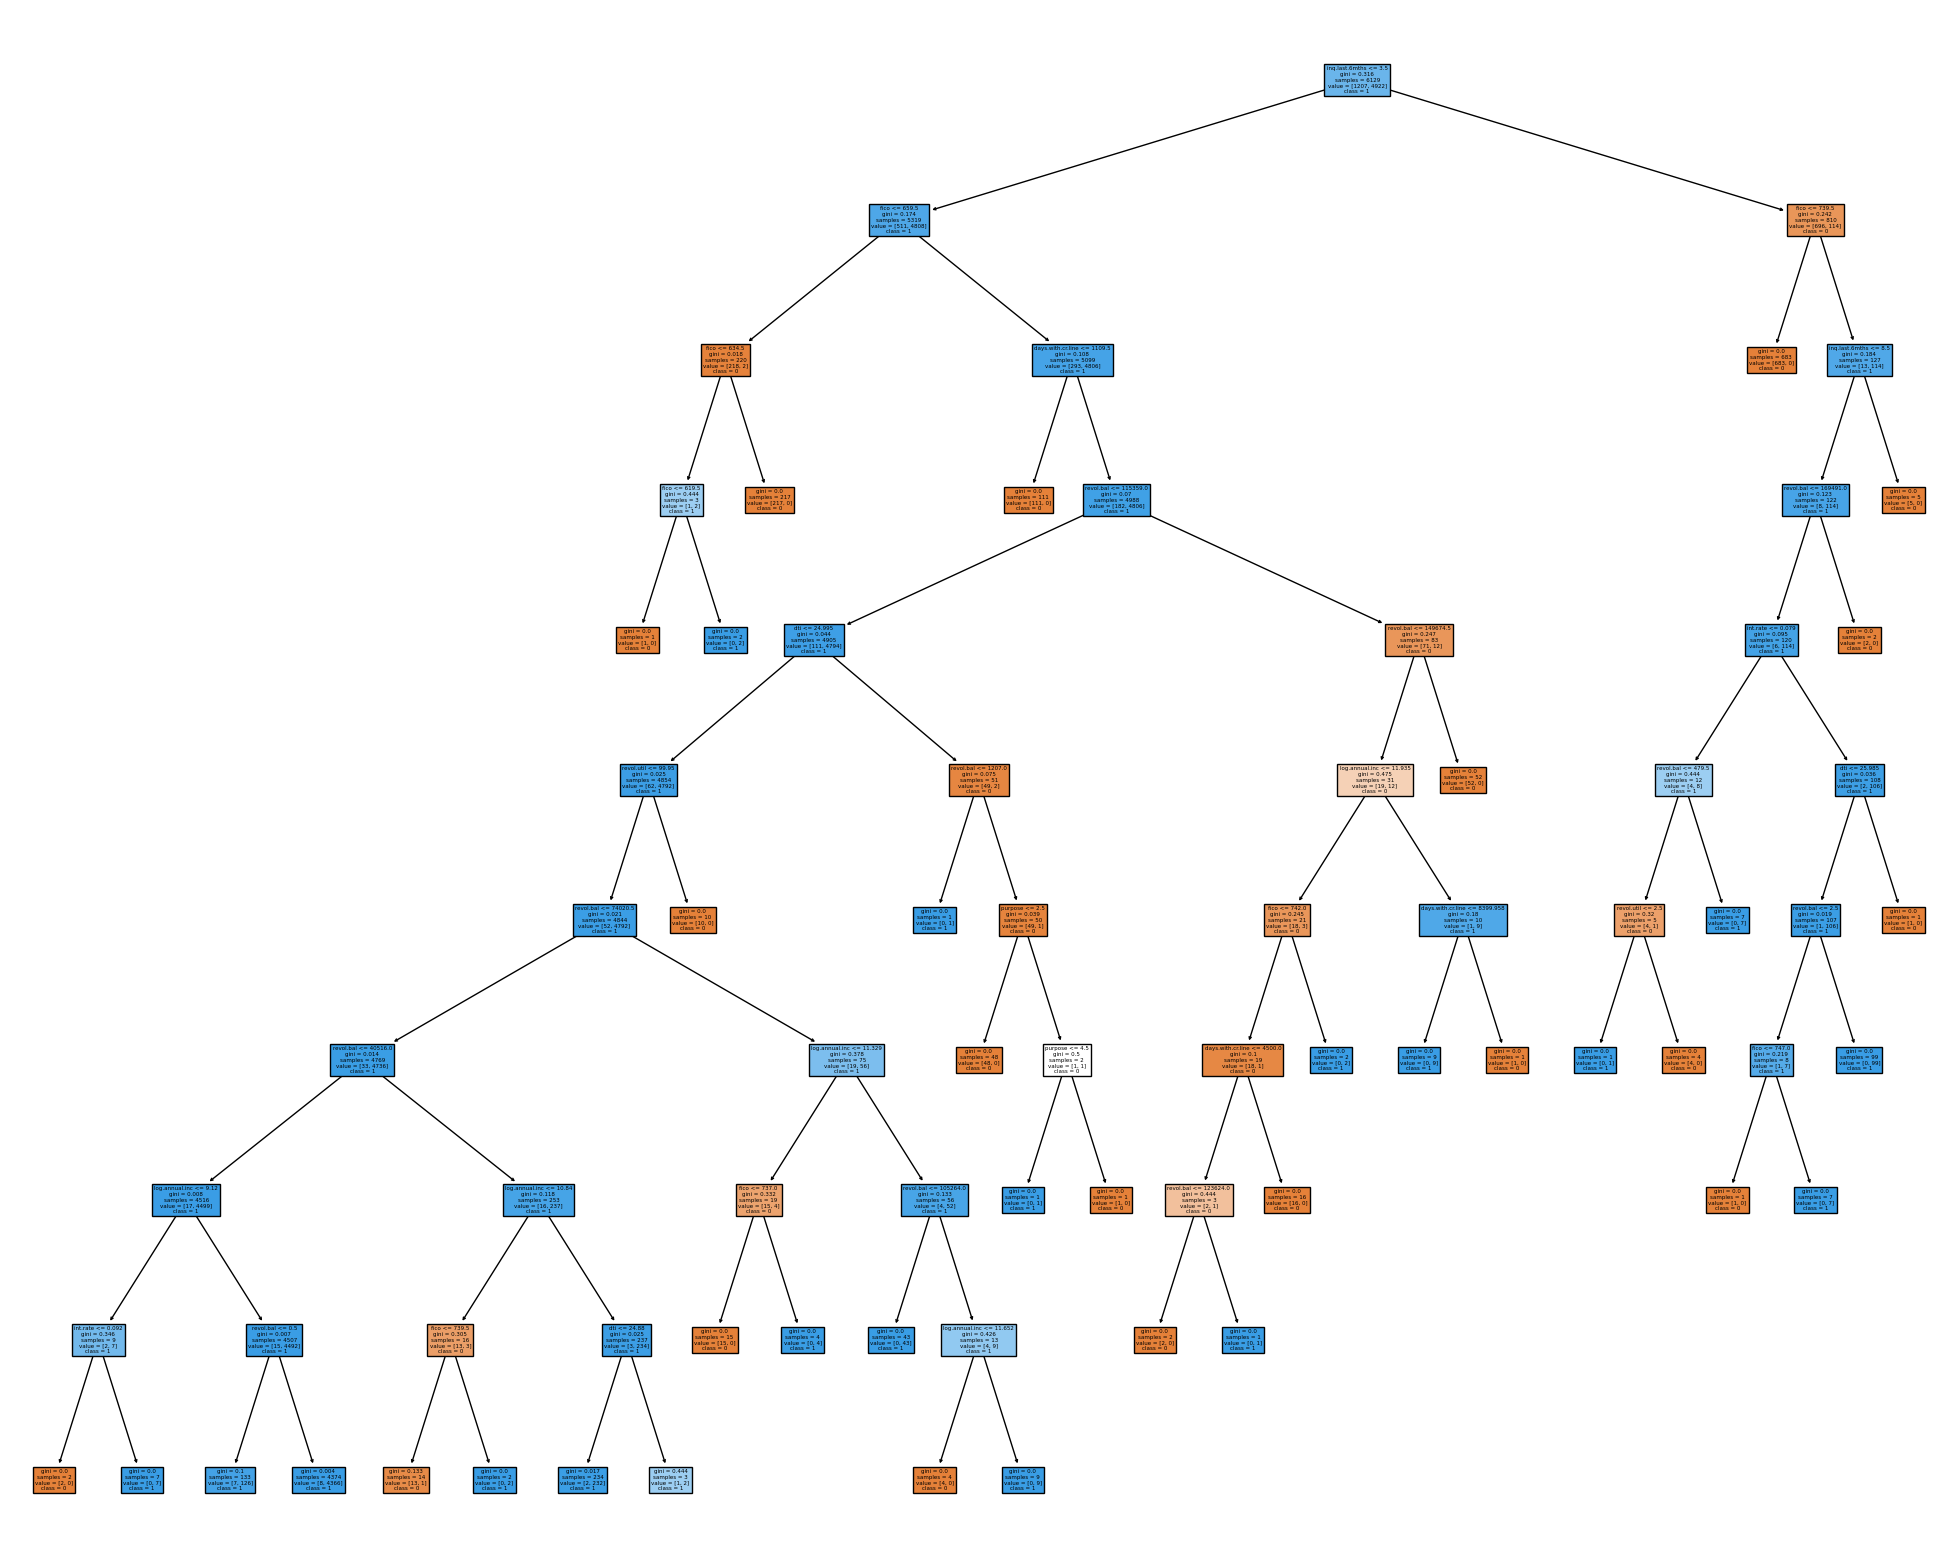

In [45]:
# visualizing a tree
# I used some code from https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html, https://mljar.com/blog/visualize-decision-tree/

from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25, 20))
_ = plot_tree(model, feature_names=df.columns[1:], class_names=[
              '0', '1'], filled=True)


In [27]:
from itertools import product
from sklearn.ensemble import RandomForestClassifier
import numpy as np

depths = list(range(5, 15))
estimators = list(range(10, 300, 15))

results = np.ndarray((len(depths), len(estimators)))

for (i, depth), (j, estimator) in product(enumerate(depths), enumerate(estimators)):
    model = RandomForestClassifier(
        max_depth=depth,
        n_estimators=estimator,
        n_jobs=-1,
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    results[i, j] = accuracy_score(y_val, y_pred)


C:\Users\machine\AppData\Local\Temp\ipykernel_6044\215895605.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\machine\AppData\Local\Temp\ipykernel_6044\215895605.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\machine\AppData\Local\Temp\ipykernel_6044\215895605.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\machine\AppData\Local\Temp\ipykernel_6044\215895605.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_trai

<AxesSubplot: >

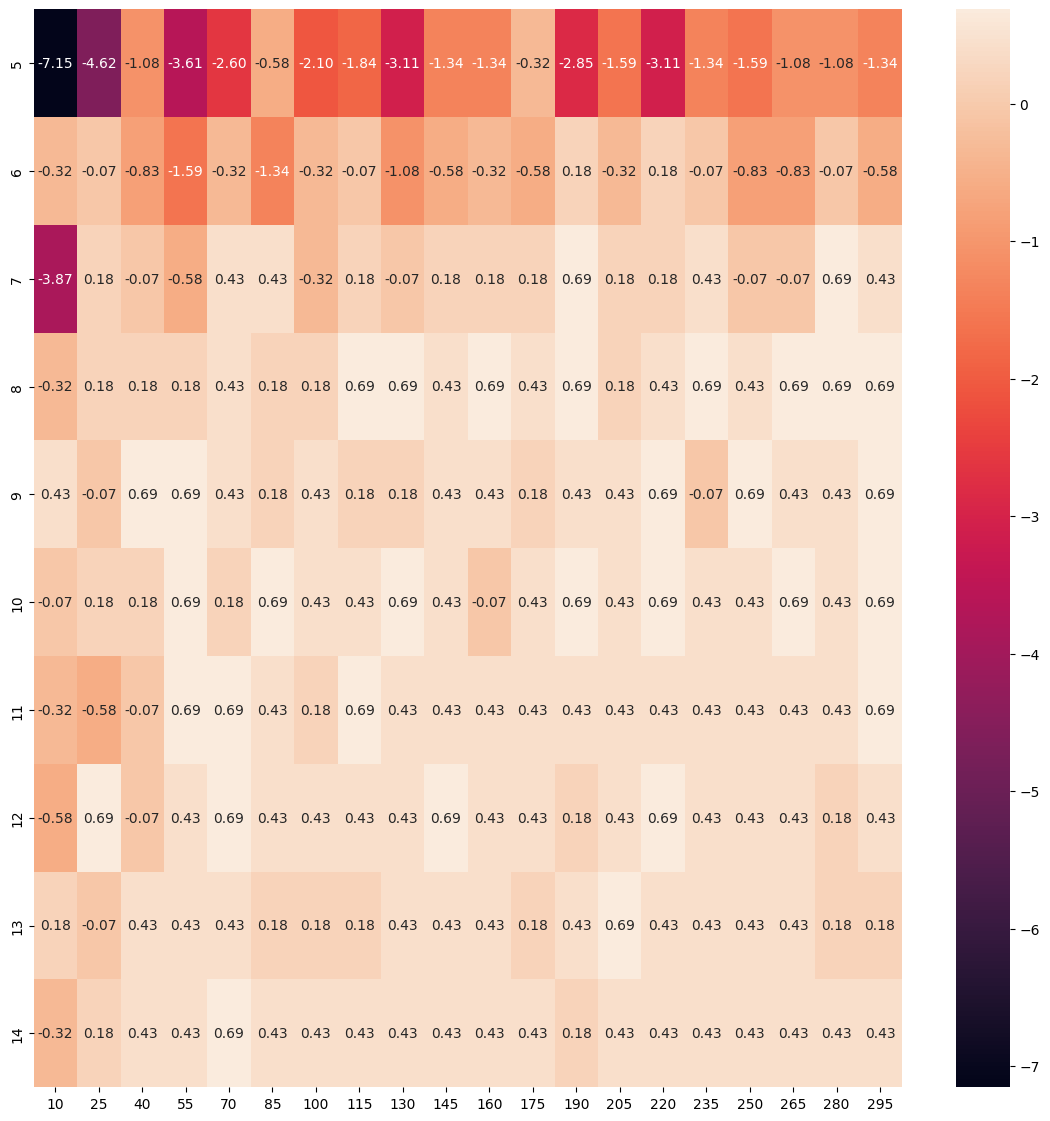

In [29]:
# I standartize results to get better view on what is happening
results_std = (results - results.mean()) / results.std()

# create sns heat map with results
plt.figure(figsize=(14, 14))
sns.heatmap(results_std, annot=True, fmt=".2f",
            xticklabels=estimators, yticklabels=depths)


### We can observe that starting from depth 8 we almost gained the maximum accuracy. I decided to stick with depth 8 and 100 estimators.

In [46]:
# create model with best parameters
model = RandomForestClassifier(n_estimators=105, max_depth=8)

model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
print("Accuracy:", accuracy_score(y_test.ravel(), y_pred))


C:\Users\machine\AppData\Local\Temp\ipykernel_6044\2148560434.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 0.9859081419624217


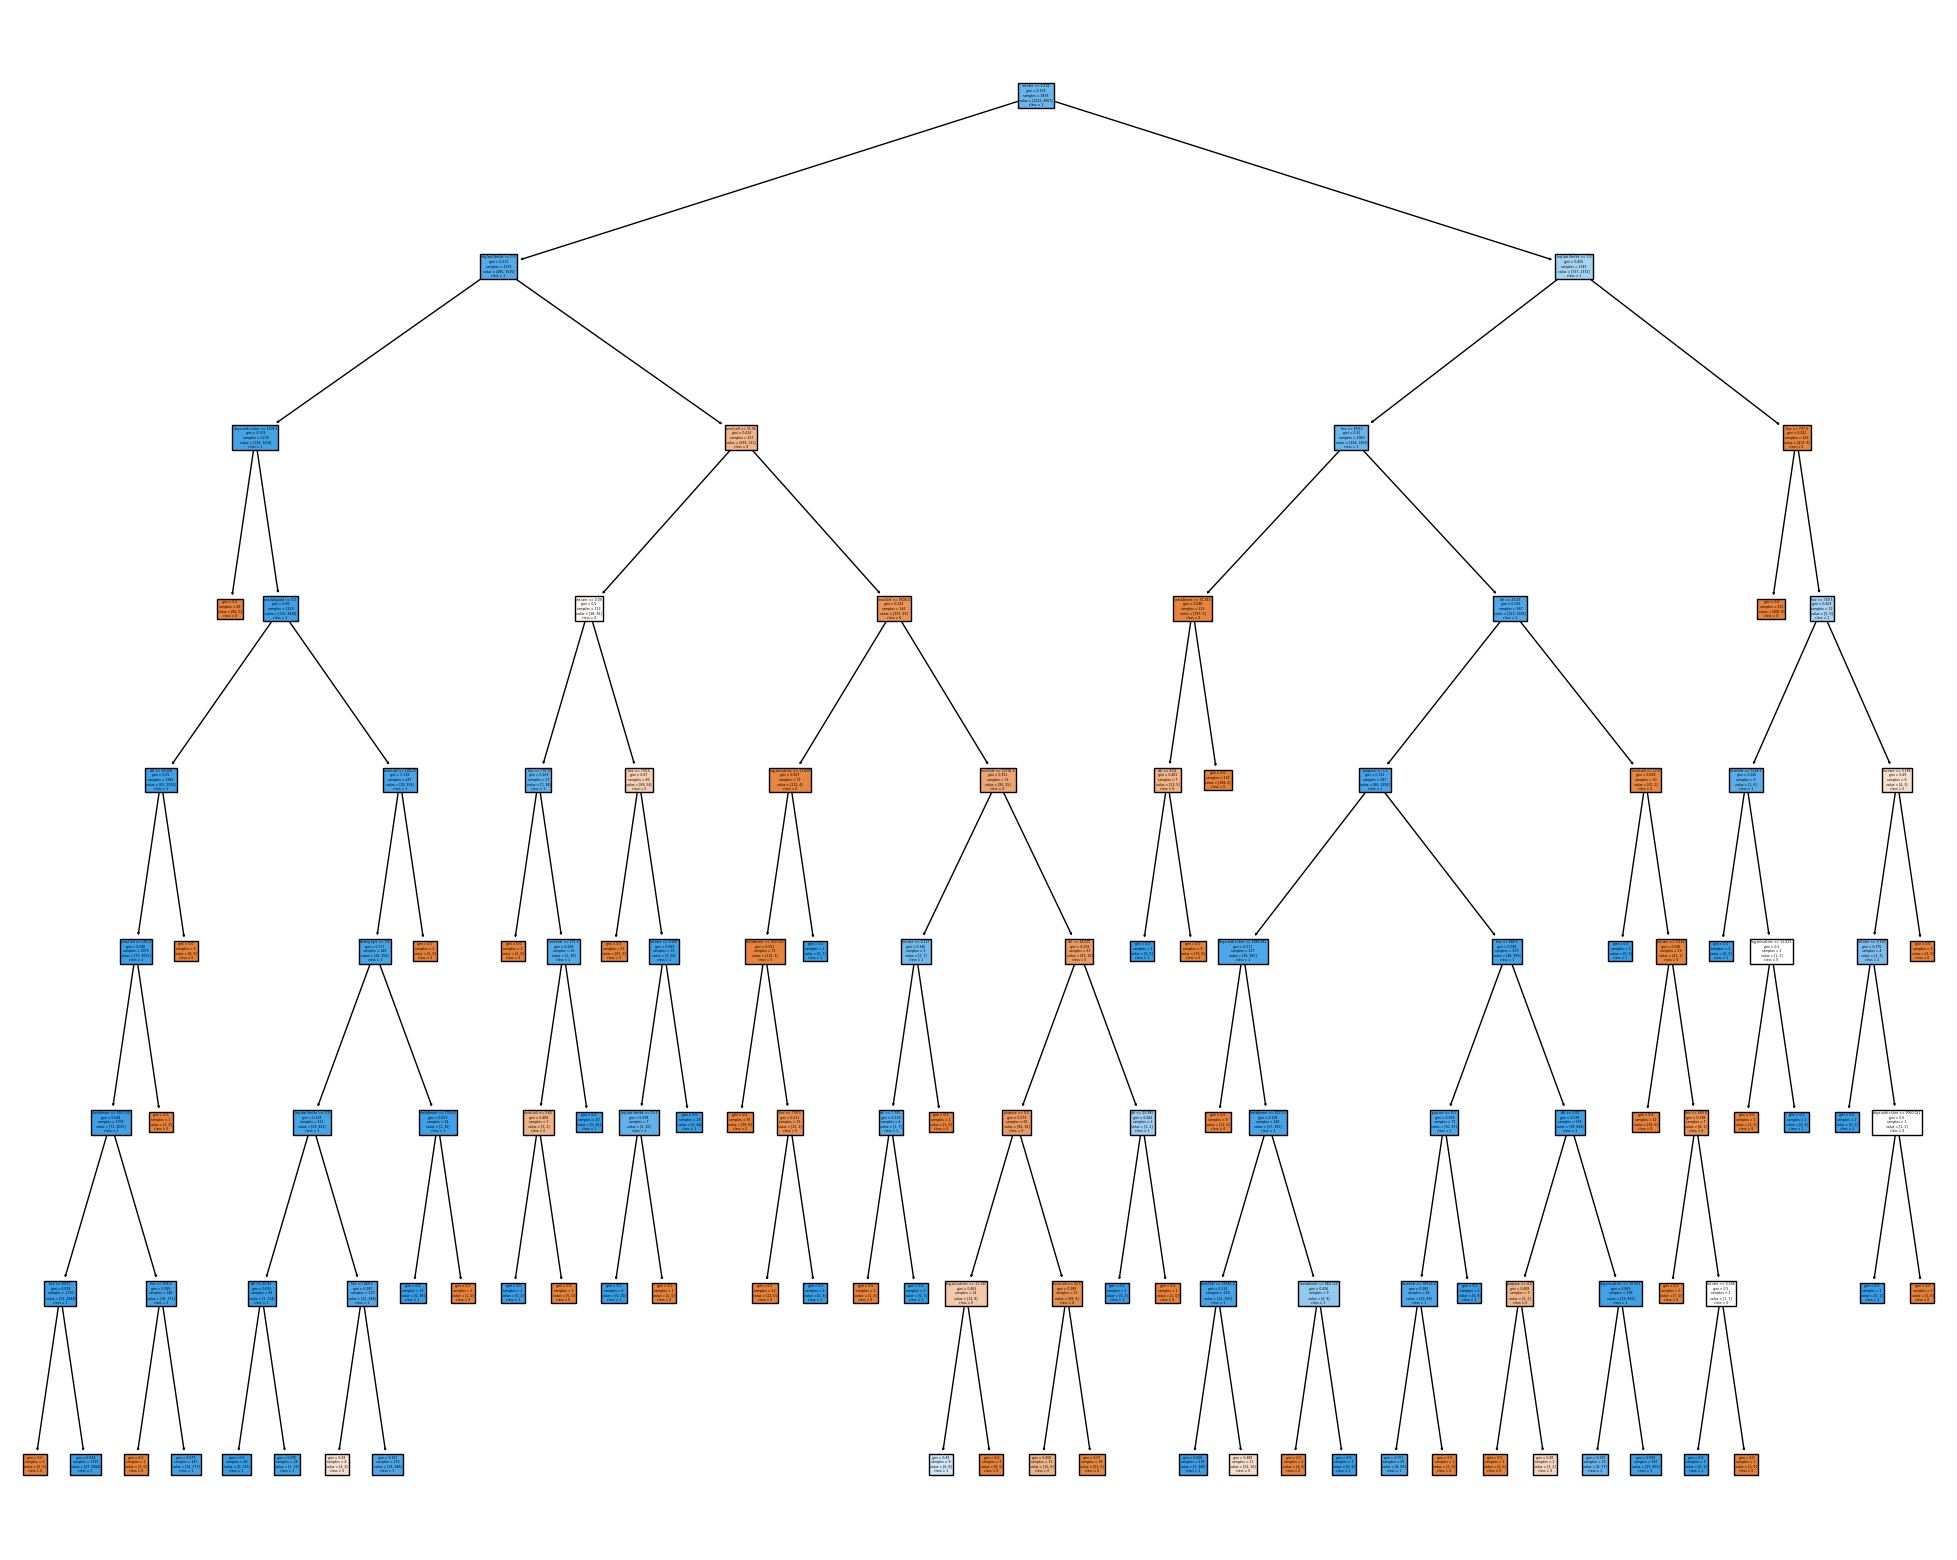

In [48]:
# visualize one tree from the forest
tree = model.estimators_[10]

# plot tree
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(tree, feature_names=df.columns[1:],
              class_names=['0', '1'], filled=True)


### Questions

1. How did the DT compare to the RF in performance? Why?
   - In my case both trees achieved almost 99% of accuracy on test set and other changes will only be biased by random seed and spread of test/train data.
   - Tuning RF was longer because it has many trees inside, as result it has more parameters.
   - RF was more stable for overfitting because each tree can utilize certain features and overall more robust technique.
2. After fine-tuning, how does the max depth in DT compare to RF? Why?
   - In my case the height of RF was less than DT because RF allows to use only certain features for each tree.
   - I think the most representable was that RF worked well with less depth because of big amount of estimators which spread features among the trees.
   - Nevertheless, my point is that this dataset was not much representable of this ability of trees because the number of features is not enourmous and both models achieved almost the same accuracy.
3. What is ensemble learning? What are its pros and cons?
   - Ensemble learning first of all is a technique. It allows to combine several models into one to gain better result.
   - Pros:
     - It would have higher predictable accuracy than single model.
     - More stable to complex datasets where we have huge linear and non-linear dependencies. It will work because we could use different models for different features/dependencies.
     - Actually many of advantages come right from the fact that there is a possibility to have several models utilizing their destinations.
   - Cons:
     - Interpretation: when you work with just single DT you can simply visualize some part of it and gain some meaning, but with ensemble learning it is not possible.
       What you have is several models packed in one and you have less chances to understand and explain model behavior.
     - Previous point also could lead to the fact that single model could actually perform better than ensembled one because of its simplicity.
     - Computational complexity: it is really obvious, you have several models which has to be trained, tuned and it takes not only time but also power.
4. Briefly explain 2 types of boosting methods and 2 types of bagging methods.
   Which of these categories does RF fall under?

   - Bagging methods (reducing variance)
     - Bootstrapping (sampling technique): samples are derived from the whole set
     - Aggregation (incroporating outcomes): all outcomes are considered and major voting applied
   - Boosting methods: (reducing bias)
     - Adaptive Boosting - iteratively identifies missed samples and adjusts weights such that training error would be minimized
     - Gradient Boosting - sequentially adds predictors where each one corrects errors of the predecessor, trains of residual errors of the previous predictor

   Random Forest is one pretty good example of bagging method because it aggregates guessing of multiple DTs and features are mostly distributed accross the trees.

References:

- [link1](https://prwatech.in/blog/tag/types-of-bagging-algorithms/)
- [link2](https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205)
- [link3](https://scikit-learn.org/stable/modules/ensemble.html)
- [link4](https://www.ibm.com/cloud/learn/boosting)


# Task 4: Domain Gap (15%)

Evaluate your CNN model from task 2 on SVHN data without retraining your model.

In [112]:
import torch

# load model from saved state
cnnstate = torch.load('cnn.pth')

cnn = CNN().to(device)

cnn.load_state_dict(cnnstate)
cnn.eval()

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=3200, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=30, bias=True)
)

In [113]:
# try to work with some image from the dataset
from PIL import Image

imgpath = "svhn/188.png"
img = Image.open(imgpath)


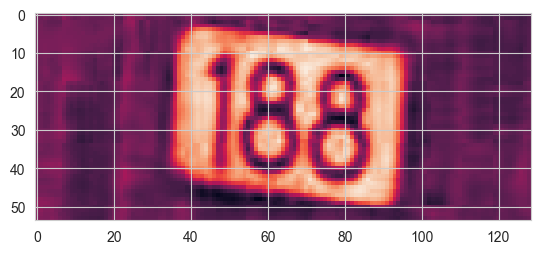

In [114]:
# show this image
plt.imshow(img.convert('L'))

## Improtant points we can mention from the beginning:

1. Images have almost nothing in common with MNIST dataset starting from color mapping and ending with the fact that dimensions of images are not the same.
1. We have to do some preprocessing to make images binary black/white and to make them 84x84 pixels.
1. As assumption I would try to reduce width of images to 84 pixels by center cropping and enlarge images with white background in height dimension.

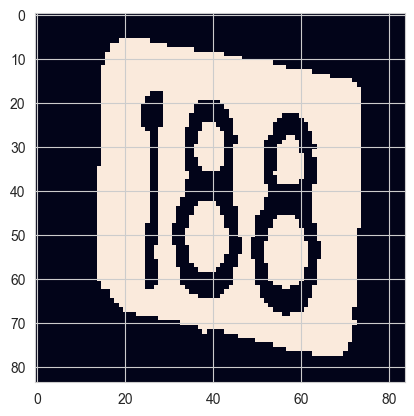

In [115]:
def image_transform(img):
    # convert image to grayscale
    img = img.convert('L')

    # crop image width to 84 from center
    width, height = img.size
    left = (width - 84) / 2
    right = (width + 84) / 2
    img = img.crop((left, 0, right, height))

    # add white background such that image would be 84 by its height
    width, height = img.size
    new_img = Image.new('L', (84, height), (255))
    new_img.paste(img, (0, 0))

    # resize image to 84x84
    new_img = new_img.resize((84, 84))


    # find min, max values
    min_val = np.array(new_img).min()
    max_val = np.array(new_img).max()
    
    # convert to binary black/white
    new_img = new_img.point(lambda x: 0 if x < (max_val / 2 + min_val / 2) else 255, '1')

    # convert image to numpy array
    img = np.array(new_img)

    # set 0 where False and 1 where True
    img = img.astype(np.float64)

    return img


res = image_transform(img)

# show image
plt.imshow(res)


In [118]:
from torch.utils.data import Dataset
import os
from PIL import Image


class SVHNImageFolder(Dataset):
    # custom dataset for SVHN images
    def __init__(self, root, transform=None):
        self.root = root
        self.images = []
        self.classes = []
        self.transform = transform

        for image in os.listdir(self.root):
            imgpath = os.path.join(self.root, image)

            self.images.append(imgpath)
            self.classes.append(int(image.split('.')[0]))

    def __getitem__(self, index):
        path, target = self.images[index], self.classes[index]

        # load image
        img = Image.open(path)

        if self.transform is not None:
            img = self.transform(img)
        return img, target

    def __len__(self):
        return len(self.images)


def img_dataset_transform(img):
    newimg = image_transform(img)

    return transforms.ToTensor()(newimg).to(device)


# import imagefolder
shvn_dataset = SVHNImageFolder(
    root="svhn/", transform=img_dataset_transform)

shvn_loader = torch.utils.data.DataLoader(
    shvn_dataset, batch_size=1, shuffle=True)


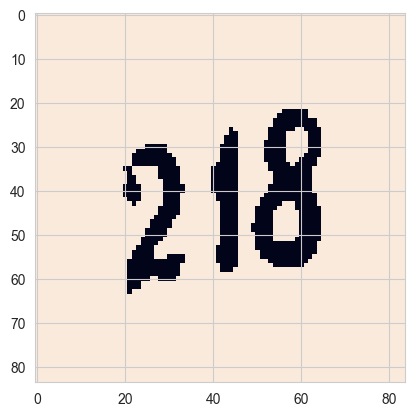

In [119]:
# get an image to test
image, target = next(iter(shvn_loader))

# show image
plt.imshow(image[0].cpu().permute(1, 2, 0))

In [122]:
# run test on our model

correct, total = 0, 0
for (image, label) in shvn_loader:
    output = cnn(image.float())

    for out, label_true in zip(output, label):
        label_pred = from_one_hot(out)

        if label_pred == label_true.item():
            correct += 1
        total += 1

print(f"Accuracy: {correct / total}")
print(f"Correct: {correct}")
print(f"Total: {total}")


Accuracy: 0.0
Correct: 0
Total: 92


### Questions

1. How did your model perform? Why is it better/worse?
   - Very proud of 0 accuracy of my model. I think the main reason was already shown in code.
     Images we are trying to predict here are very different in comparison with triple mnist dataset we were training model with.
     Although I believe through good preprocessing we could achieve some results, but overall I see no point in trying to do it.
     That would take more time than to train a new model from scratch.
   - Although I would like to mention that one of my coursemates discovered that about 25% of dataset was corrupted and the result is not much representative.
2. What is domain gap in the context of ML?
   - We could try to define model domain as a combination of what we train model on and what type of data we want to predict.
     Domain gap in terms of machine learning is a bridge between several contexts of data. In our case it is a difference between
     dataset with handwritten digits which resulted in TripleMNIST dataset and dataset with some house numbers taken from camera.
3. Suggest two ways through which the problem of domain gap can be tackled.
   - One way would be to use ensemble learning and train several models on different datasets and combine results later.
     Using such approach we try not to miss results we already achieved with one model on TripleMNIST dataset and try to
     enhance our performace with another model trained on SVHN dataset.
   - The other way it to spend more time on preprocessing of SVHN dataset. In my opinion it is harder, but using such approach
     we would possibly transform each image of SVHN dataset to the same format we trained TripleMNIST on. This way another dataset
     for our model would not be more than just new testing data.

References:

- [link1](https://machinelearning.apple.com/research/bridging-the-domain-gap-for-neural-models)
- [link2](http://yann.lecun.com/exdb/mnist/)
- [link3](http://ufldl.stanford.edu/housenumbers/)
